In [1]:

# Import the numpy and pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns

%matplotlib inline

# Supress Warnings
import warnings

import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

warnings.filterwarnings("ignore")


pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",120)


In [2]:
loan_data= pd.read_csv("loan.csv")   # Loading the data file
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
# code for inspection, checking the data and their ranges
loan_data.describe(include="all")   

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

In [4]:
print(loan_data.columns) # checking the columns 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### 1. Data Cleaning

In [7]:
loan_data.isnull().sum(axis=0).sort_values()    # Checking for the Null Values

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
loan_data= loan_data.loc[:,loan_data.isnull().sum(axis=0)!=39717]   # Removing the columns where all the inputs are Null
loan_data.shape

(39717, 57)

This should have made the data more readable and concise. Let us inspect the data some more.

In [9]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
#Some of the columns are not useful to us based on the data dicitionary, so we can remove those columns. 
#Some columns such as title, can be removed and instead purpose can be used in it's place.

#Cleaning the data by removing some non-usable columns post checking data dictionary and data values

loan_data = loan_data.drop(columns = ['next_pymnt_d','last_pymnt_amnt','last_pymnt_d','url','desc','title','zip_code']) # Non- productive columns
loan_data = loan_data.drop(columns = ['pymnt_plan','collections_12_mths_ex_med','application_type','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','initial_list_status','tax_liens']) # Columns have only singular input


loan_data.info() #datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [11]:
# Formating the required date columns

loan_data["issue_d"]= pd.to_datetime(loan_data["issue_d"],format = '%b-%y')
loan_data["last_credit_pull_d"]= pd.to_datetime(loan_data["last_credit_pull_d"],format = '%b-%y')

### 2. Exploratory Data Analysis

#### 2.1 Univariate Analysis

In [12]:
loan_data["pub_rec"].value_counts() #analysing the pub_rec column

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [13]:
loan_data["pub_rec_bankruptcies"].value_counts() #analysing the pub_rec_bankruptcies column

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
loan_data["issue_d"].value_counts() # Analysing the issue date

2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
              ... 
2007-08-01      33
2008-09-01      32
2007-07-01      30
2007-09-01      18
2007-06-01       1
Name: issue_d, Length: 55, dtype: int64

### Analyzing the Emp Title column

In [15]:
loan_data.loc[loan_data["loan_status"]=="Charged Off","emp_title"].value_counts() # Analysing the emp title

Bank of America              20
US Army                      18
Walmart                      14
UPS                          12
AT&T                         12
                             ..
U of D Jesuit High School     1
EEOC                          1
Life Ambulance                1
R. Young Enterprise, Inc.     1
Auto motors of miami          1
Name: emp_title, Length: 4636, dtype: int64

As we can see that the most number of defaulted persons are employed in Bank of America. ironic!
But it's hard to get any trend out of the employer because these are all individual companies. Unless we can group them in specific buckets, it does not make sense to explore more on this column.

In [16]:
loan_data.loc[loan_data["emp_title"]=="Bank of America","emp_title"].value_counts()# Analysing the emp_title specific to BOA

Bank of America    109
Name: emp_title, dtype: int64

For Bank of America, 20 out of 109 employees are getting defaulted, i.e, approximately 20%.

In [17]:
loan_data.loc[loan_data["emp_title"]=="US Army","emp_title"].value_counts() # Analysing the emp_title specific to US Army

US Army    134
Name: emp_title, dtype: int64

### Analyzing home ownership and it's relation with risk

In [18]:
# Running analysis on home ownership type
loan_data_pivoted_home=loan_data.pivot_table(index=["home_ownership"],values="id",columns="loan_status",aggfunc="count",fill_value=0)
loan_data_pivoted_home.reset_index(inplace=True)
loan_data_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,2327,638,14694
1,NONE,0,0,3
2,OTHER,18,0,80
3,OWN,443,83,2532
4,RENT,2839,419,15641


In [19]:
loan_data_pivoted_home["total"]= loan_data_pivoted_home["Charged Off"]+loan_data_pivoted_home["Current"]+loan_data_pivoted_home["Fully Paid"]
loan_data_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid,total
0,MORTGAGE,2327,638,14694,17659
1,NONE,0,0,3,3
2,OTHER,18,0,80,98
3,OWN,443,83,2532,3058
4,RENT,2839,419,15641,18899


In [20]:
#Changing the valus to % for better understanding
loan_data_pivoted_home["Charged Off"]= (loan_data_pivoted_home["Charged Off"]/loan_data_pivoted_home["total"])*100
loan_data_pivoted_home["Current"]= (loan_data_pivoted_home["Current"]/loan_data_pivoted_home["total"])*100
loan_data_pivoted_home["Fully Paid"]= (loan_data_pivoted_home["Fully Paid"]/loan_data_pivoted_home["total"])*100

loan_data_pivoted_home= loan_data_pivoted_home.drop("total",axis=1)
loan_data_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,13.177417,3.612889,83.209695
1,NONE,0.000000,0.000000,100.000000
2,OTHER,18.367347,0.000000,81.632653
3,OWN,14.486593,2.714192,82.799215
4,RENT,15.021959,2.217049,82.760993


In [21]:
# Removing the None type
loan_data_pivoted_home= loan_data_pivoted_home.loc[loan_data_pivoted_home["home_ownership"]!="NONE",]
loan_data_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,13.177417,3.612889,83.209695
2,OTHER,18.367347,0.000000,81.632653
3,OWN,14.486593,2.714192,82.799215
4,RENT,15.021959,2.217049,82.760993


<AxesSubplot: xlabel='home_ownership'>

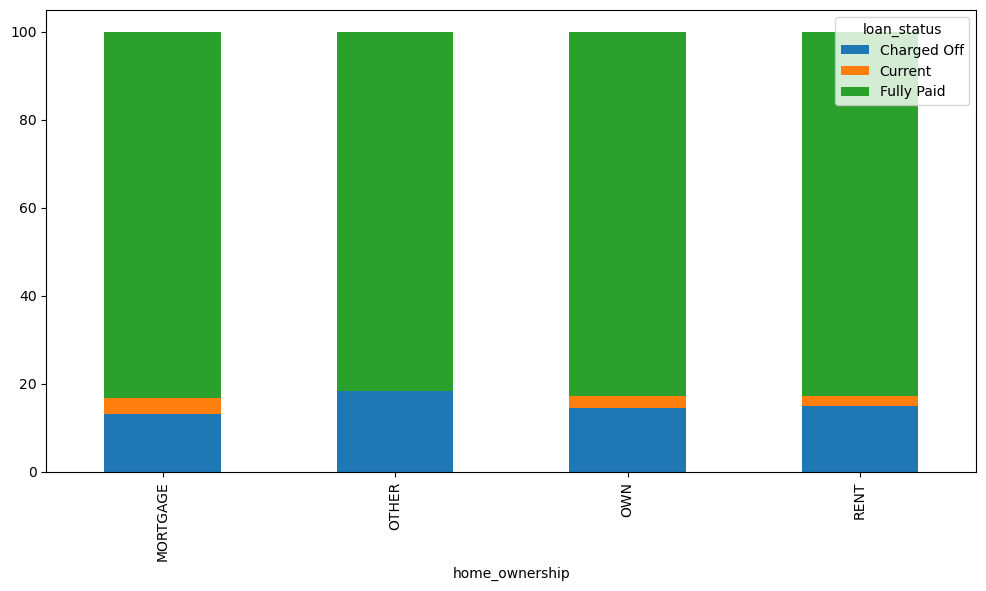

In [22]:
loan_data_pivoted_home.plot(x="home_ownership",kind="bar",stacked=True,figsize=(12,6))


So we are unable to find any substantial trends here. Home ownership is not a strong indicator of the risk of default

#### Analyzing annual income and it's association with risk of default

In [23]:
# Analysing the anuual income
loan_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [24]:
loan_data.annual_inc.mean()

68968.92637711811

Since annual income is a quantitative variable and we cannot compare the values, we need to convert the annual income variable to a categorical variable for analysis. For this let's convert the annual income into income groups such as lower income, lower middle class, middle class and high income.
The idea for the income ranges in each group is approximately same as taken by studies from American census. 
https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx

In [25]:
#Dividing in some groups for better understanding
income_bin_ranges=[0,40000,80000,120000,6000000]
income_bin_names= ["lower_income","lower_middle_class","upper_middle_class","high_income"]

In [26]:
loan_data["income_bins"]= pd.cut(loan_data["annual_inc"],bins=income_bin_ranges,labels=income_bin_names)
loan_data["income_bins"].count()

39717

In [27]:
loan_data_pivoted_2= loan_data.pivot_table(index=["income_bins"],values="id",columns="loan_status",aggfunc="count")
loan_data_pivoted_2.reset_index(inplace=True)

In [28]:
loan_data_pivoted_2["total"]= loan_data_pivoted_2["Charged Off"]+loan_data_pivoted_2["Current"]+loan_data_pivoted_2["Fully Paid"]

In [29]:
loan_data_pivoted_2["Charged Off"]= round((loan_data_pivoted_2["Charged Off"]/loan_data_pivoted_2["total"])*100,2)

loan_data_pivoted_2["Current"]= round((loan_data_pivoted_2["Current"]/loan_data_pivoted_2["total"])*100,2)

loan_data_pivoted_2["Fully Paid"]= round((loan_data_pivoted_2["Fully Paid"]/loan_data_pivoted_2["total"])*100,2)

loan_data_pivoted_2=loan_data_pivoted_2.drop("total",axis=1)
loan_data_pivoted_2

loan_status,income_bins,Charged Off,Current,Fully Paid
0,lower_income,17.73,1.81,80.46
1,lower_middle_class,14.14,3.00,82.85
2,upper_middle_class,10.93,3.54,85.54
3,high_income,10.62,3.81,85.57


<AxesSubplot: xlabel='income_bins'>

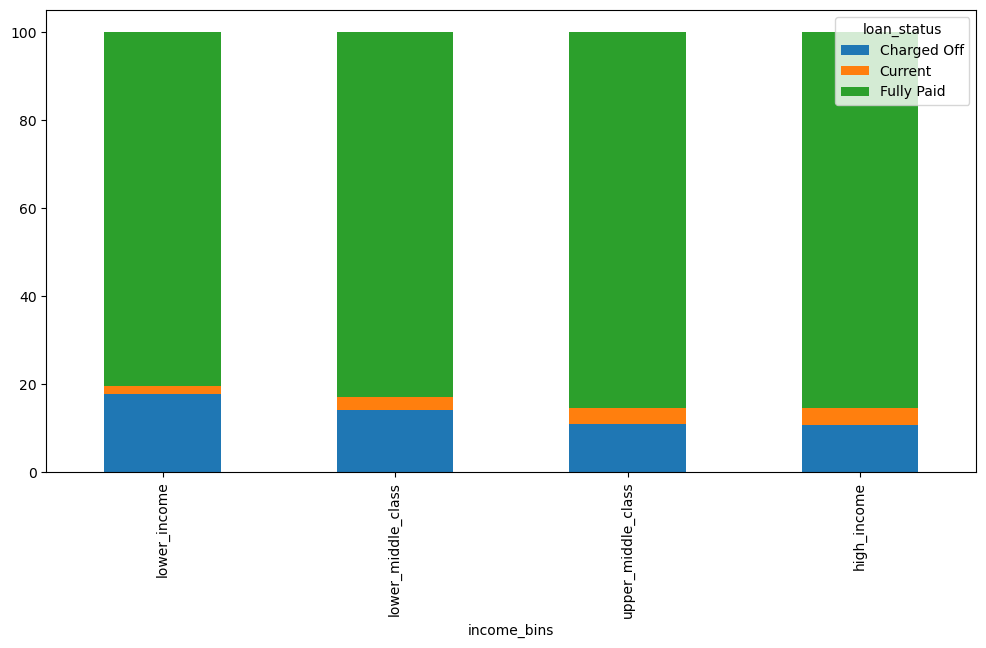

In [30]:
loan_data_pivoted_2.plot(kind="bar",x="income_bins",stacked=True,figsize=(12,6))


It is clear from this plot that the lower income borrowers are more risky as they tend to default more on their lones.
Aboe trends can show some relation in charged off% with the salary 


#### Analyzing verification status column

In [31]:
#Running analysis on verification status
loan_data["verification_status"].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [32]:
loan_data_verific_pivot= loan_data.pivot_table(index="verification_status",columns="loan_status",values="id",aggfunc="count")
loan_data_verific_pivot.reset_index(inplace=True)

loan_data_verific_pivot

loan_status,verification_status,Charged Off,Current,Fully Paid
0,Not Verified,2142,227,14552
1,Source Verified,1434,310,8243
2,Verified,2051,603,10155


In [33]:
loan_data_verific_pivot["Total"]= loan_data_verific_pivot["Charged Off"]+loan_data_verific_pivot["Current"]+loan_data_verific_pivot["Fully Paid"]
loan_data_verific_pivot["Charged Off"]= round((loan_data_verific_pivot["Charged Off"]/loan_data_verific_pivot["Total"])*100,2)
loan_data_verific_pivot["Current"]= round((loan_data_verific_pivot["Current"]/loan_data_verific_pivot["Total"])*100,2)
loan_data_verific_pivot["Fully Paid"]= round((loan_data_verific_pivot["Fully Paid"]/loan_data_verific_pivot["Total"])*100,2)
loan_data_verific_pivot= loan_data_verific_pivot.drop("Total",axis=1)
loan_data_verific_pivot

loan_status,verification_status,Charged Off,Current,Fully Paid
0,Not Verified,12.66,1.34,86.00
1,Source Verified,14.36,3.10,82.54
2,Verified,16.01,4.71,79.28


<AxesSubplot: xlabel='verification_status'>

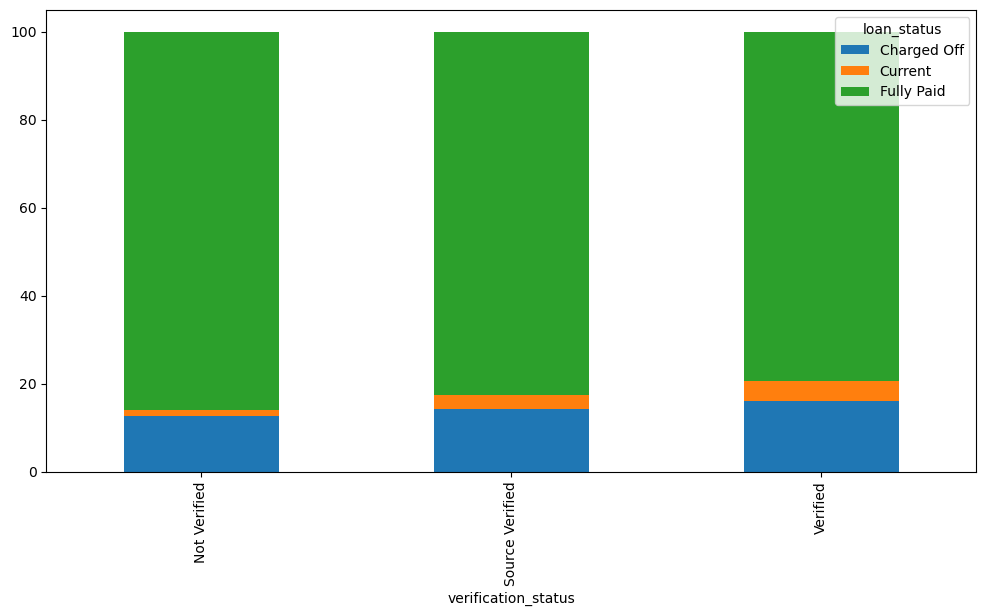

In [34]:
loan_data_verific_pivot.plot(kind="bar",stacked=True,x="verification_status",figsize=(12,6))

Somehow, it is contradictory to our hypothesis that non-verified borrowers are more likely to default. It can bee observed that more verified application tends to be default than non-verified

#### Analyzing if the Purpose column is affecting tendency to default

In [35]:
#Analysing the purpose
loan_data["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [36]:
loan_data_purpose=loan_data.pivot_table(index="purpose",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_purpose.reset_index(inplace=True)
loan_data_purpose

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,160,50,1339
1,credit_card,542,103,4485
2,debt_consolidation,2767,586,15288
3,educational,56,0,269
4,home_improvement,347,101,2528
5,house,59,14,308
6,major_purchase,222,37,1928
7,medical,106,12,575
8,moving,92,7,484
9,other,633,128,3232


In [37]:
loan_data_purpose["Total"]= loan_data_purpose["Charged Off"]+loan_data_purpose["Current"]+loan_data_purpose["Fully Paid"]
loan_data_purpose["Charged Off"]= round((loan_data_purpose["Charged Off"]/loan_data_purpose["Total"])*100,2)
loan_data_purpose["Current"]= round((loan_data_purpose["Current"]/loan_data_purpose["Total"])*100,2)
loan_data_purpose["Fully Paid"]= round((loan_data_purpose["Fully Paid"]/loan_data_purpose["Total"])*100,2)
loan_data_purpose= loan_data_purpose.drop("Total",axis=1)
loan_data_purpose



loan_status,purpose,Charged Off,Current,Fully Paid
0,car,10.33,3.23,86.44
1,credit_card,10.57,2.01,87.43
2,debt_consolidation,14.84,3.14,82.01
3,educational,17.23,0.00,82.77
4,home_improvement,11.66,3.39,84.95
5,house,15.49,3.67,80.84
6,major_purchase,10.15,1.69,88.16
7,medical,15.30,1.73,82.97
8,moving,15.78,1.20,83.02
9,other,15.85,3.21,80.94


<AxesSubplot: xlabel='purpose'>

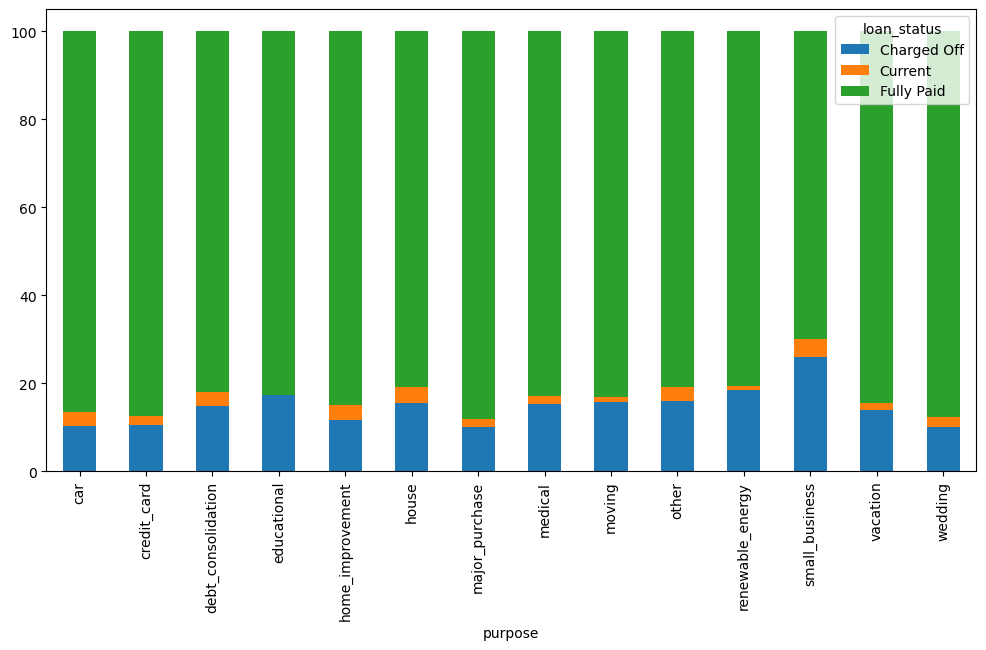

In [38]:
loan_data_purpose.plot(kind="bar",stacked=True,x="purpose",figsize=(12,6))

It is very evident that purpose of the loan is a good factor to find charged off cases. Small businesses and renewable energy are more highly frequent default cases. 

#### Checking if there is a relation between default cases and State

In [39]:
loan_data_pivot_state= loan_data.pivot_table(index=["addr_state"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pivot_state= loan_data_pivot_state.reset_index()
loan_data_pivot_state



loan_status,addr_state,Charged Off,Current,Fully Paid
0,AK,15,2,63
1,AL,54,17,381
2,AR,27,10,208
3,AZ,123,30,726
4,CA,1125,150,5824
5,CO,98,26,668
6,CT,94,25,632
7,DC,15,3,196
8,DE,12,1,101
9,FL,504,85,2277


In [40]:
loan_data_pivot_state_filtered= loan_data_pivot_state.loc[loan_data_pivot_state["Charged Off"]+loan_data_pivot_state["Current"]+loan_data_pivot_state["Fully Paid"]>=10,]
loan_data_pivot_state_filtered

loan_status,addr_state,Charged Off,Current,Fully Paid
0,AK,15,2,63
1,AL,54,17,381
2,AR,27,10,208
3,AZ,123,30,726
4,CA,1125,150,5824
5,CO,98,26,668
6,CT,94,25,632
7,DC,15,3,196
8,DE,12,1,101
9,FL,504,85,2277


In [41]:
#Since we have been calculating the percentage of default in each of the variables, we should define the function to calculate the function

# Defining the function to find % of charged off in all the future cases
def percentage_cal (df,x,y,z):
    df["total"]= df[x]+df[y]+df[z]
    df[x]= (df[x]/df["total"])*100
    df[y]= (df[y]/df["total"])*100
    df[z]= (df[z]/df["total"])*100
    

In [42]:
percentage_cal(loan_data_pivot_state,"Charged Off","Current","Fully Paid")

percentage_cal(loan_data_pivot_state_filtered,"Charged Off","Current","Fully Paid")

In [43]:
loan_data_pivot_state_filtered=loan_data_pivot_state_filtered.drop("total",axis=1)
loan_data_pivot_state_filtered.sort_values(by="Charged Off",ascending=False)


loan_status,addr_state,Charged Off,Current,Fully Paid
32,NV,21.730382,3.621730,74.647887
0,AK,18.750000,2.500000,78.750000
40,SD,18.750000,3.125000,78.125000
9,FL,17.585485,2.965806,79.448709
24,MO,16.618076,2.332362,81.049563
11,HI,16.091954,4.597701,79.310345
31,NM,15.873016,3.174603,80.952381
4,CA,15.847302,2.112974,82.039724
36,OR,15.742794,3.547672,80.709534
43,UT,15.503876,2.325581,82.170543


In [44]:
# Very clearly some states have higher % of charged off

<AxesSubplot: xlabel='addr_state'>

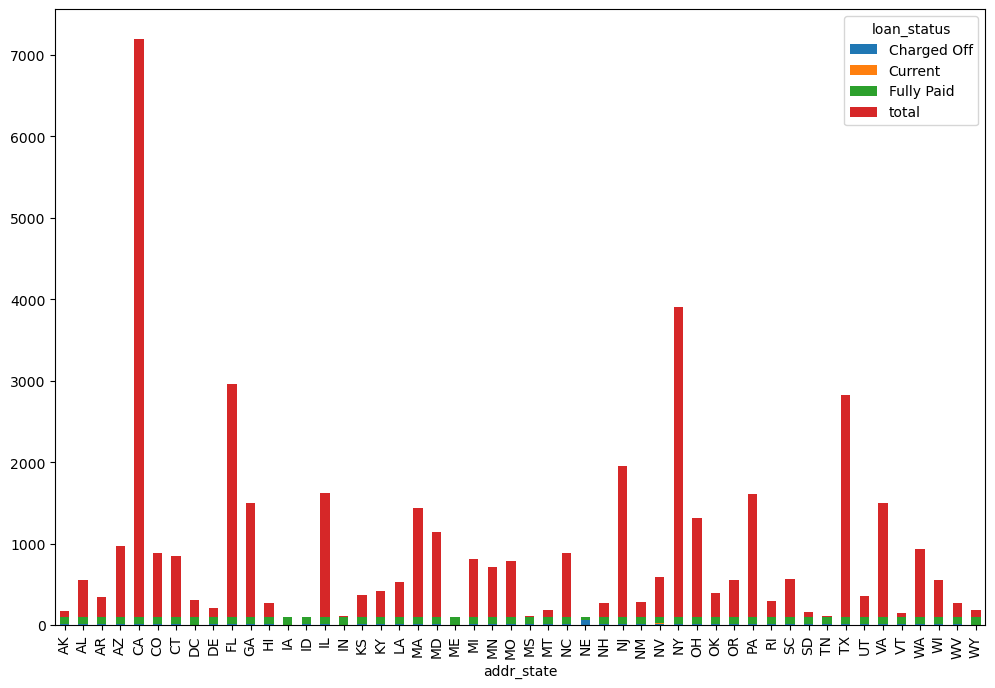

In [45]:

loan_data_pivot_state.plot(kind="bar",stacked=True,x="addr_state",figsize= (12,8))

In [47]:
# We can observe that some states are tend to make more defaults
for col in loan_data_pivot_state_filtered.columns:
    loan_data_pivot_state_filtered[col] = loan_data_pivot_state_filtered[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [go.Choropleth(
    locations=loan_data_pivot_state_filtered['addr_state'],
    z=loan_data_pivot_state_filtered["Charged Off"].astype(float),
    locationmode='USA-states',
    colorscale=scl,
    marker=dict(
        line=dict(
            color='rgb(255,255,255)',
            width=2
        )),
    colorbar=dict(
        title="Millions USD")
)]

layout = go.Layout(
    title='State-wise % Charged off <br>(Hover for breakdown)',
    geo=dict(
        scope='usa',
        projection=dict(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'),
)

fig = go.Figure(data=data, layout=layout)

# Show the plot in your Jupyter Notebook
fig.show()


#### Analyzing the dti variable

In [48]:
loan_data.dti.value_counts()

0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: dti, Length: 2868, dtype: int64

In [49]:
loan_data.loc[loan_data["dti"]==0.00]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,income_bins
2629,1033741,1263519,25000,25000,24950.000000,36 months,7.90%,782.26,A,A4,NaN,10+ years,MORTGAGE,200000.0,Source Verified,2011-11-01,Fully Paid,home_improvement,MA,0.0,0,Feb-88,3,NaN,NaN,6,0,0,0%,14,0.0,0.0,25634.619510,25583.34,25000.00,634.62,0.0,0.00,0.000,2013-02-01,0.0,high_income
2938,1028983,1258336,15000,15000,15000.000000,36 months,7.51%,466.67,A,A3,bnsf railway,9 years,MORTGAGE,65004.0,Not Verified,2011-11-01,Fully Paid,other,MO,0.0,0,Dec-02,0,NaN,NaN,4,0,0,0%,14,0.0,0.0,16214.565510,16214.57,15000.00,1214.57,0.0,0.00,0.000,2013-04-01,0.0,lower_middle_class
3208,1023172,1251991,3500,3500,3500.000000,36 months,16.29%,123.56,D,D1,WiFiFee LLC.,3 years,MORTGAGE,50000.0,Not Verified,2011-11-01,Charged Off,major_purchase,NY,0.0,1,Apr-02,0,10.0,NaN,3,0,0,0%,16,0.0,0.0,4019.000000,4019.00,3019.28,930.32,0.0,69.40,0.694,2015-01-01,0.0,lower_middle_class
4086,1008627,1235314,6500,6500,6500.000000,36 months,10.65%,211.73,B,B2,Donovan Hatem LLP,2 years,MORTGAGE,56650.0,Not Verified,2011-11-01,Fully Paid,debt_consolidation,MA,0.0,0,Oct-98,2,NaN,NaN,2,0,0,0%,7,0.0,0.0,7267.224670,7267.22,6500.00,767.22,0.0,0.00,0.000,2014-10-01,0.0,lower_middle_class
4545,1001046,1226814,5150,5150,5150.000000,36 months,7.90%,161.15,A,A4,Walmart Information Systems Division,7 years,RENT,68000.0,Verified,2011-11-01,Fully Paid,debt_consolidation,AR,0.0,0,Sep-97,2,78.0,NaN,6,0,0,0%,10,0.0,0.0,5801.189857,5801.19,5150.00,651.19,0.0,0.00,0.000,2016-04-01,0.0,lower_middle_class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,153022,153018,3000,3000,1825.000000,36 months,7.12%,92.80,A,A1,"Park Place Everett, LLC",5 years,MORTGAGE,93000.0,Not Verified,2007-11-01,Fully Paid,home_improvement,WA,0.0,0,Apr-85,0,0.0,0.0,7,0,368,1.20%,15,0.0,0.0,3339.035809,2031.25,3000.00,339.04,0.0,0.00,0.000,2010-10-01,NaN,upper_middle_class
39613,136491,136485,5000,5000,1574.995234,36 months,12.17%,166.48,D,D2,NaN,< 1 year,RENT,10000.0,Not Verified,2007-10-01,Charged Off,small_business,MD,0.0,1,Aug-01,2,15.0,0.0,5,0,875,54.70%,8,0.0,0.0,2477.030000,779.40,1756.71,574.25,0.0,146.07,1.480,2015-03-01,NaN,lower_income
39632,130907,130904,3775,3775,925.000000,36 months,7.43%,117.31,A,A2,SRA Benefits,7 years,MORTGAGE,120000.0,Not Verified,2007-10-01,Fully Paid,other,MO,0.0,0,Dec-96,1,64.0,0.0,10,0,0,0%,22,0.0,0.0,4191.717919,1027.11,3775.00,416.72,0.0,0.00,0.000,2016-03-01,NaN,upper_middle_class
39694,90966,90962,5000,5000,4150.000000,36 months,7.43%,155.38,A,A2,Oracle Corporation,8 years,MORTGAGE,150000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,GA,0.0,0,Dec-87,0,0.0,0.0,2,0,6053,19.50%,19,0.0,0.0,5174.186842,4294.58,5000.00,174.19,0.0,0.00,0.000,2007-06-01,NaN,high_income


In [50]:
# Segmenting the DTI in ranges for better understanding

dti_ranges= [-1,0,5,10,15,20,30]
dti_names= ["0","0-5","5-10","10-15","15-20","20-30"]

In [51]:
loan_data["dti_bins"]= pd.cut(loan_data["dti"],bins= dti_ranges,labels=dti_names)

In [52]:
loan_data["dti_bins"].value_counts()

10-15    9899
15-20    9095
5-10     8072
20-30    7491
0-5      4977
0         183
Name: dti_bins, dtype: int64

In [53]:
loan_data_pivot_dti= loan_data.pivot_table(index=["dti_bins"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pivot_dti= loan_data_pivot_dti.reset_index()

<AxesSubplot: xlabel='dti_bins'>

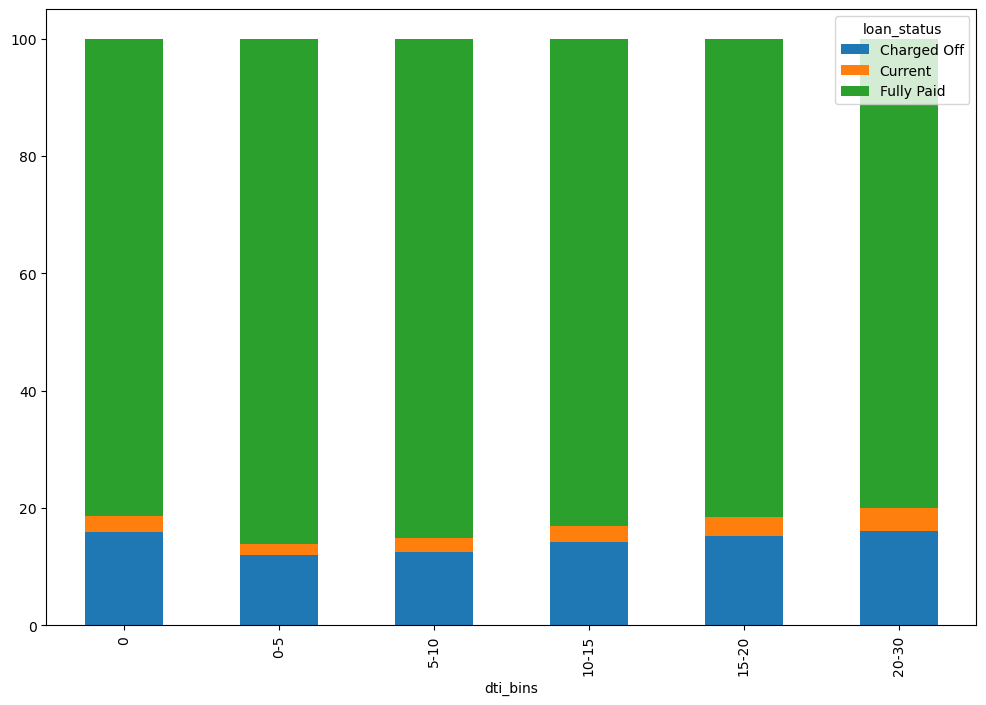

In [54]:
percentage_cal(loan_data_pivot_dti,"Charged Off","Current","Fully Paid")
loan_data_pivot_dti= loan_data_pivot_dti.drop("total",axis=1)
loan_data_pivot_dti.plot(kind="bar",stacked=True,x="dti_bins",figsize= (12,8))

##### It is clear that the DTI has an association with risk. As we can see that as the dti increases from 0-5 to 20-30, the % of charged off cases increases. The 0 cases also show siginificant risk because these probably are those cases that don't have any loan and hence don't have a lot of experience in dealing with loans and hence chances of default


#### Analyzing the delinq status in past 2 years

In [55]:
loan_data["delinq_2yrs"].value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [56]:
# Analysing delinq_2yrs
loan_data_pivot_delinq= loan_data.pivot_table(index="delinq_2yrs",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pivot_delinq.reset_index(inplace=True)


In [57]:
percentage_cal(loan_data_pivot_delinq,"Charged Off","Current","Fully Paid")

In [58]:
loan_data_pivot_delinq
loan_data_pivot_delinq=loan_data_pivot_delinq.drop("total",axis=1)

<AxesSubplot: xlabel='delinq_2yrs'>

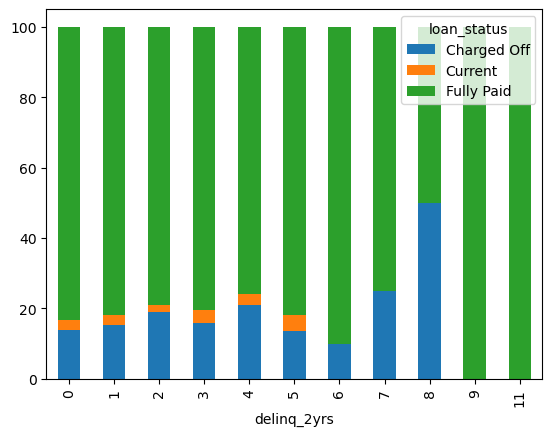

In [59]:
loan_data_pivot_delinq.plot(kind="bar",stacked=True,x="delinq_2yrs")

##### Is is somewhat clear that the more the number of delinq cases, the greater the risk

In [60]:
# Analysing inq_last_6mths
loan_data.inq_last_6mths.value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [61]:
loan_data_pivot_inq= loan_data.pivot_table(index="inq_last_6mths",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pivot_inq.reset_index(inplace=True)
loan_data_pivot_inq

loan_status,inq_last_6mths,Charged Off,Current,Fully Paid
0,0,2280,591,16429
1,1,1677,311,8983
2,2,943,158,4711
3,3,619,65,2364
4,4,51,10,265
5,5,28,2,116
6,6,16,1,47
7,7,10,1,24
8,8,3,1,11


In [62]:
percentage_cal(loan_data_pivot_inq,"Charged Off","Current","Fully Paid")
loan_data_pivot_inq=loan_data_pivot_inq.drop("total",axis=1)

<AxesSubplot: xlabel='inq_last_6mths'>

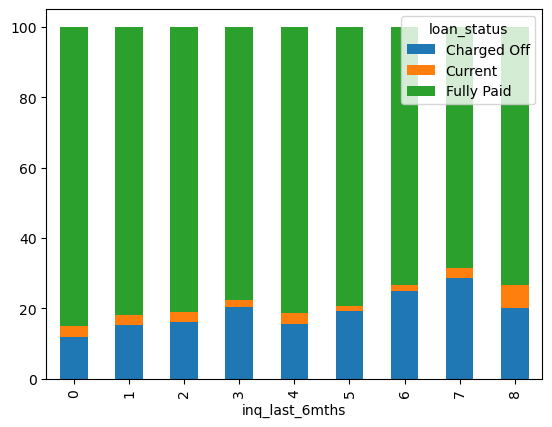

In [63]:
loan_data_pivot_inq.plot(kind="bar",stacked=True,x="inq_last_6mths")

##### More number of inq means the borrower is looking for greater credit and hence higher chances of default

In [64]:
loan_data.loc[(~pd.isnull(loan_data["mths_since_last_record"]))&(loan_data["mths_since_last_record"]==0),"pub_rec"].value_counts()

0    670
Name: pub_rec, dtype: int64

mths since last record can be removed. the column pub record can be used as it's proxy as that would mean that whether a record exists for him or not

#### Analyzing number of open accounts for risk of default

In [65]:
loan_data_pivot_accts= loan_data.pivot_table(index=["open_acc"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pivot_accts.reset_index(inplace=True)
#loan_data_pivot_accts= loan_data_pivot_accts.loc[]

In [66]:
loan_data_pivot_accts= loan_data_pivot_accts.loc[loan_data_pivot_accts["Charged Off"]+loan_data_pivot_accts["Current"]+loan_data_pivot_accts["Fully Paid"]>=10,]
loan_data_pivot_accts

loan_status,open_acc,Charged Off,Current,Fully Paid
0,2,127,9,469
1,3,258,23,1212
2,4,364,43,1936
3,5,425,72,2686
4,6,543,100,3303
5,7,557,109,3352
6,8,546,122,3268
7,9,518,111,3089
8,10,465,126,2632
9,11,382,80,2284


In [67]:
percentage_cal(loan_data_pivot_accts,"Charged Off","Current","Fully Paid")
loan_data_pivot_accts= loan_data_pivot_accts.drop("total",axis=1)

<AxesSubplot: xlabel='open_acc'>

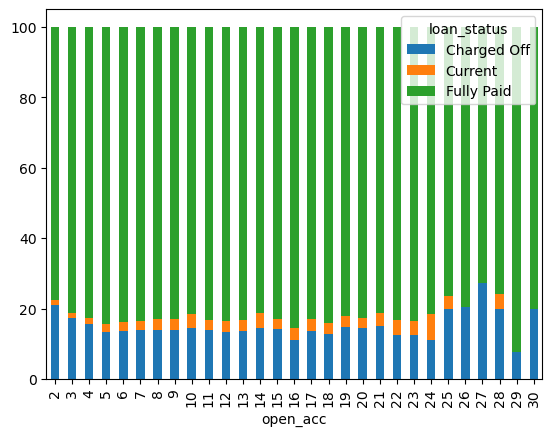

In [68]:
loan_data_pivot_accts.plot(kind="bar",stacked=True,x="open_acc")

#### Analyzing grade of loan to check the impact on default

In [69]:

#Analysing on the basis of the grade
Loan_groupby_Grade = loan_data.groupby(['grade','loan_status'])['id'].count()
Loan_groupby_Grade= Loan_groupby_Grade.unstack()
Loan_groupby_Grade['Total'] = Loan_groupby_Grade['Charged Off'] + Loan_groupby_Grade['Current'] + Loan_groupby_Grade['Fully Paid']
Loan_groupby_Grade['Charged Off'] = (Loan_groupby_Grade['Charged Off']/Loan_groupby_Grade['Total'])*100
Loan_groupby_Grade['Current'] = (Loan_groupby_Grade['Current']/Loan_groupby_Grade['Total'])*100
Loan_groupby_Grade['Fully Paid'] = (Loan_groupby_Grade['Fully Paid']/Loan_groupby_Grade['Total'])*100

Loan_groupby_Grade = Loan_groupby_Grade.drop(columns = ['Total'])

Loan_groupby_Grade


loan_status,Charged Off,Current,Fully Paid
grade,,,
A,5.969261,0.396629,93.634110
B,11.855241,2.870216,85.274542
C,16.633737,3.260064,80.106199
D,21.066516,4.183154,74.750330
E,25.158339,6.298381,68.543279
F,30.409914,6.959009,62.631077
G,31.962025,5.379747,62.658228


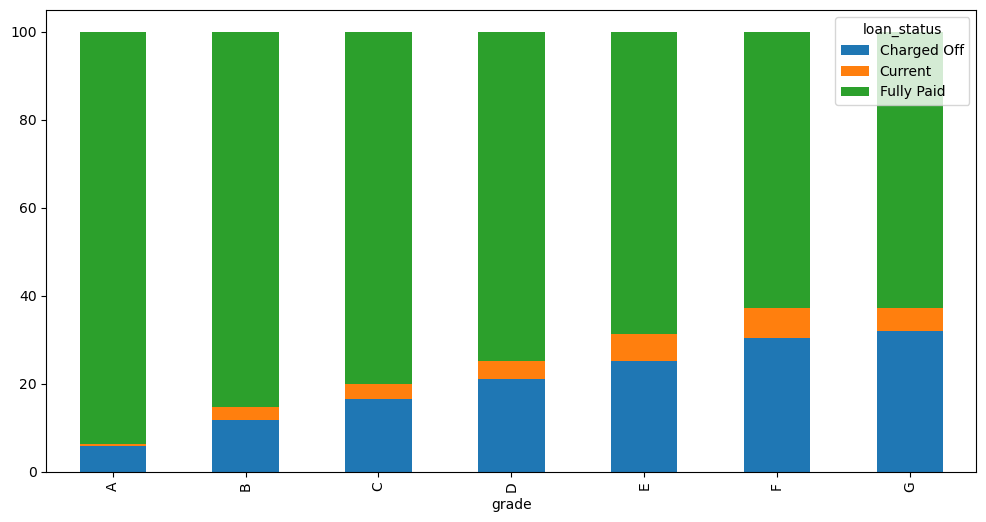

In [70]:
Loan_Plot = Loan_groupby_Grade.plot(kind='bar',stacked=True,figsize=(12,6))

##### Very evident from the above plot that plays an important role and we can know the probability of defaulting

#### Analyzing term of loan

In [71]:

#Analysing for the term of the laon
Loan_groupby_Term = loan_data.groupby(['term','loan_status'])['id'].count()
Loan_groupby_Term = Loan_groupby_Term.unstack()


Loan_groupby_Term = Loan_groupby_Term.fillna(0)

Loan_groupby_Term['Total'] = Loan_groupby_Term['Charged Off'] + Loan_groupby_Term['Current'] + Loan_groupby_Term['Fully Paid']
Loan_groupby_Term['Charged Off'] = (Loan_groupby_Term['Charged Off']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term['Current'] = (Loan_groupby_Term['Current']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term['Fully Paid'] = (Loan_groupby_Term['Fully Paid']/Loan_groupby_Term['Total'])*100
Loan_groupby_Term = Loan_groupby_Term.drop(columns = ['Total'])


Loan_groupby_Term




loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,11.090872,0.000000,88.909128
60 months,22.596742,10.733453,66.669805


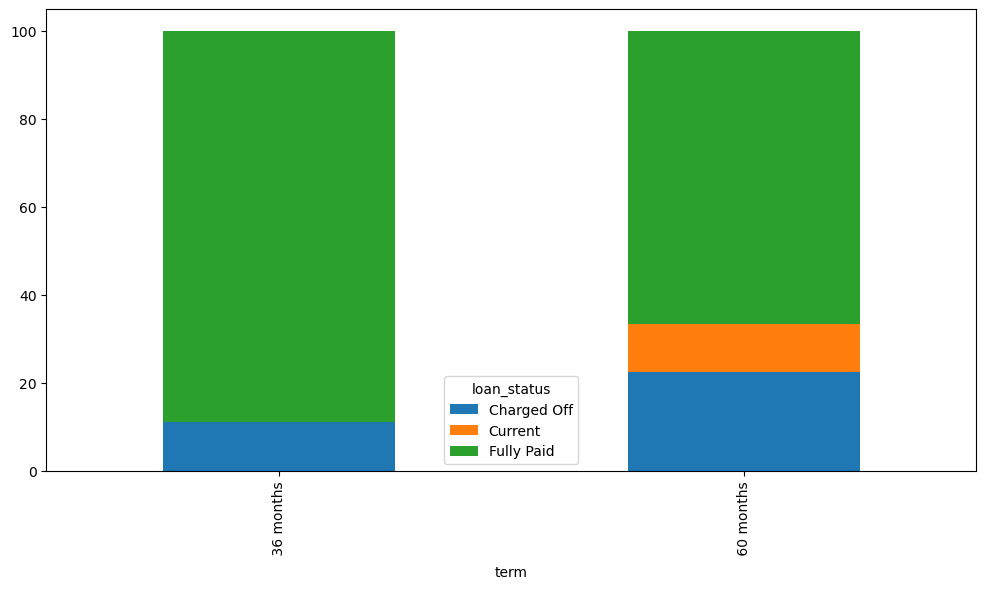

In [72]:
Loan_Plot3 = Loan_groupby_Term.plot(kind='bar',stacked=True,figsize=(12,6))

##### Higer the term higher the prob of charged off


#### Analysisng for the amount applied

In [73]:
def l_amt_Group(x):
    if (x['loan_amnt'] >= 0) and (x['loan_amnt'] <= 6000):
        return 'G1'
    elif (x['loan_amnt'] > 6000) and (x['loan_amnt'] <= 12000):
        return 'G2'
    elif (x['loan_amnt'] > 12000) and (x['loan_amnt'] <=18000):
        return 'G3'
    elif (x['loan_amnt'] > 18000) and (x['loan_amnt'] <= 24000):
        return 'G4'
    elif (x['loan_amnt'] > 24000) and (x['loan_amnt'] <= 30000):
        return 'G5'
    elif (x['loan_amnt'] > 30000) and (x['loan_amnt'] <= 36000 ):
        return 'G6'

    
    
   
LoanFunded_amt_group1 = loan_data.assign(l_amt_Group=loan_data.apply(l_amt_Group, axis=1))

LoanFunded_amt= LoanFunded_amt_group1.pivot_table(index=["l_amt_Group"],columns="loan_status",values="id",aggfunc="count",fill_value=0)
LoanFunded_amt= LoanFunded_amt.reset_index()
LoanFunded_amt

LoanFunded_amt['Total'] = LoanFunded_amt['Charged Off'] + LoanFunded_amt['Current'] + LoanFunded_amt['Fully Paid']
LoanFunded_amt['Charged Off'] = (LoanFunded_amt['Charged Off']/LoanFunded_amt['Total'])*100
LoanFunded_amt['Current'] = (LoanFunded_amt['Current']/LoanFunded_amt['Total'])*100
LoanFunded_amt['Fully Paid'] = (LoanFunded_amt['Fully Paid']/LoanFunded_amt['Total'])*100

LoanFunded_amt = LoanFunded_amt.drop(columns = ['Total'])

LoanFunded_amt

loan_status,l_amt_Group,Charged Off,Current,Fully Paid
0,G1,13.222875,1.069734,85.707392
1,G2,12.938340,1.680304,85.381356
2,G3,14.859145,4.612465,80.528390
3,G4,16.554244,5.789770,77.655987
4,G5,18.016109,6.867317,75.116575
5,G6,21.739130,11.231884,67.028986


Text(4.444444444444452, 0.5, '% of status')

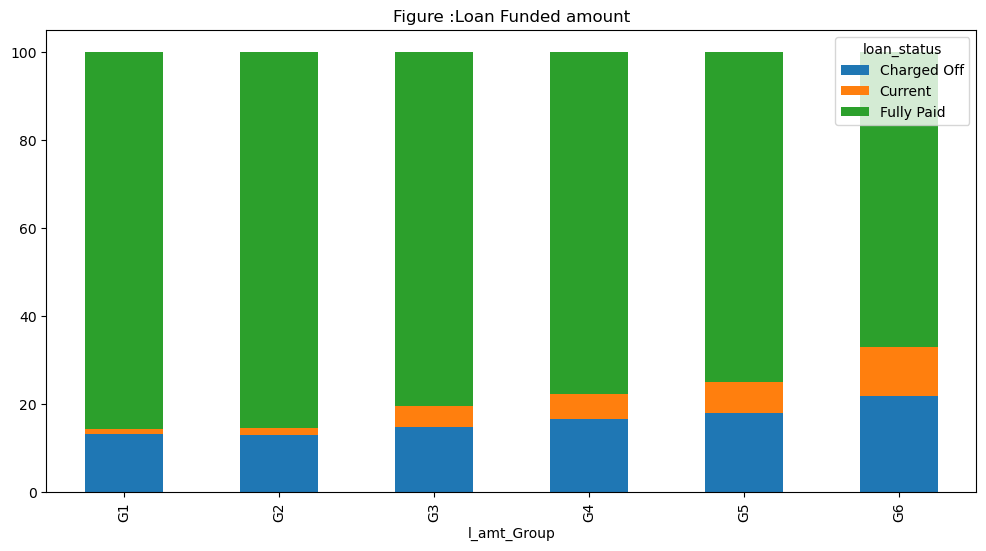

In [74]:
Loan_amnt_group = LoanFunded_amt.plot(kind='bar',stacked=True,title="Figure :Loan Funded amount",figsize=(12,6),x="l_amt_Group")
Loan_Plot3.set_xlabel("Loan Groups")
Loan_Plot3.set_ylabel("% of status")

##### Higer the loan amount higher the prob of charged off

####  Analysing for revol_util variable

In [75]:

loan_data.loc[pd.isnull(loan_data["revol_util"]),"revol_util"]= 0
loan_data["revol_util"]= loan_data["revol_util"].str.replace("%","")
loan_data["revol_util"]= loan_data["revol_util"].astype(float)
revol_util_bins=[-1,0,20,40,60,80,100]
revol_util_names= ["0","0-20","20-40","40-60","60-80","80-100"]

loan_data["revol_util_bin"]= pd.cut(loan_data["revol_util"],bins=revol_util_bins,labels=revol_util_names)

loan_revol_util= loan_data.groupby(["revol_util_bin","loan_status"])["id"].count().unstack()

loan_revol_util.reset_index(inplace=True)
loan_revol_util



loan_status,revol_util_bin,Charged Off,Current,Fully Paid
0,0,144,23,810
1,0-20,626,133,6180
2,20-40,915,220,6790
3,40-60,1236,257,7172
4,60-80,1356,286,6658
5,80-100,1334,221,5306


In [76]:
percentage_cal(loan_revol_util,"Charged Off","Current","Fully Paid")
loan_revol_util=loan_revol_util.drop("total",axis=1)
loan_revol_util

loan_status,revol_util_bin,Charged Off,Current,Fully Paid
0,0,14.738997,2.354145,82.906858
1,0-20,9.021473,1.916703,89.061824
2,20-40,11.545741,2.776025,85.678233
3,40-60,14.264282,2.965955,82.769763
4,60-80,16.337349,3.445783,80.216867
5,80-100,19.443230,3.221105,77.335665


<AxesSubplot: xlabel='revol_util_bin'>

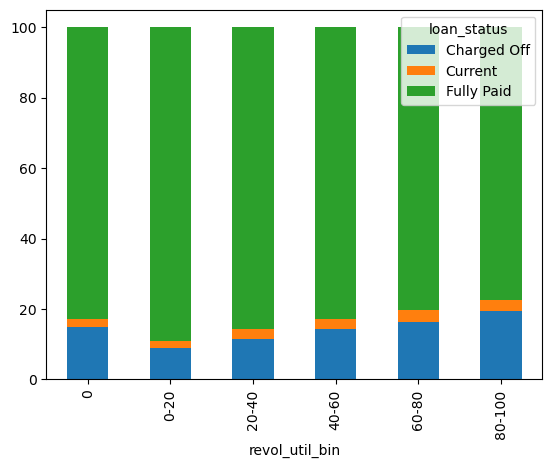

In [77]:
loan_revol_util.plot(kind="bar",stacked=True,x="revol_util_bin")

##### higher the revol_util rate, it produce higher default rate. The cases with 0 util rate have high default because these guys are not using credit and hence probably don't have good experience with credit handling

#### Creating a new variable using the revol_bal column

In [78]:
#creating a new variable, revol_bal_loan_ratio which will be loan_amount/revol_bal

loan_data["revol_bal_loan_ratio"]= round((loan_data["revol_bal"]/loan_data["loan_amnt"])*100,2)
loan_data["revol_bal_loan_ratio"].value_counts().sort_index(ascending=False)
loan_data["revol_bal_loan_ratio"].describe()

count    39717.000000
mean       156.046136
std        267.042943
min          0.000000
25%         46.360000
50%         94.080000
75%        162.180000
max      13082.800000
Name: revol_bal_loan_ratio, dtype: float64

In [79]:
revol_bal_loan_ratio_bins= [-1,0,25,50,75,100,125,150,175,200,20000]
revol_bal_loan_ratio_labels= ["0","0-25","25-50","50-75","75-100","100-125","125-150","150-175","175-200",">200"]

In [80]:
loan_data["revol_bal_loan_ratio_bins"]= pd.cut(loan_data["revol_bal_loan_ratio"],bins=revol_bal_loan_ratio_bins,labels=revol_bal_loan_ratio_labels)
loan_data.revol_bal_loan_ratio_bins.value_counts()

>200       7618
75-100     5559
50-75      5086
25-50      4920
0-25       4770
100-125    4662
125-150    2759
150-175    1963
175-200    1384
0           996
Name: revol_bal_loan_ratio_bins, dtype: int64

In [81]:
loan_data_revol_ratio_pivot= loan_data.groupby(["revol_bal_loan_ratio_bins","loan_status"])["id"].count().unstack()
loan_data_revol_ratio_pivot.reset_index(inplace=True)
loan_data_revol_ratio_pivot

loan_status,revol_bal_loan_ratio_bins,Charged Off,Current,Fully Paid
0,0,158,22,816
1,0-25,641,138,3991
2,25-50,780,162,3978
3,50-75,810,174,4102
4,75-100,762,196,4601
5,100-125,581,139,3942
6,125-150,368,87,2304
7,150-175,273,43,1647
8,175-200,195,35,1154
9,>200,1059,144,6415


<AxesSubplot: xlabel='revol_bal_loan_ratio_bins'>

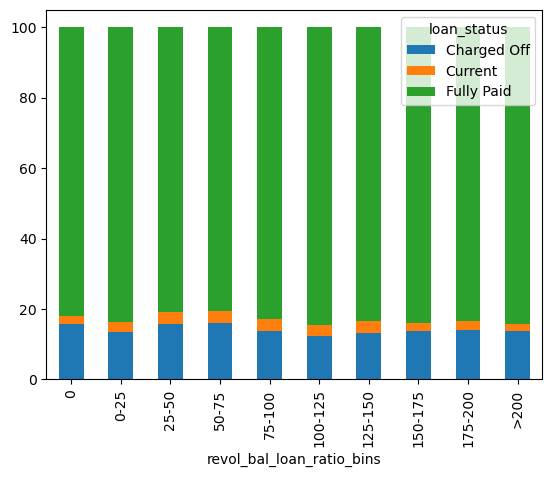

In [82]:
percentage_cal(loan_data_revol_ratio_pivot,"Charged Off","Current","Fully Paid")
loan_data_revol_ratio_pivot=loan_data_revol_ratio_pivot.drop("total",axis=1)
loan_data_revol_ratio_pivot.plot(kind="bar",stacked=True,x="revol_bal_loan_ratio_bins")

#### Analyzing public records' impact

<AxesSubplot: xlabel='pub_rec'>

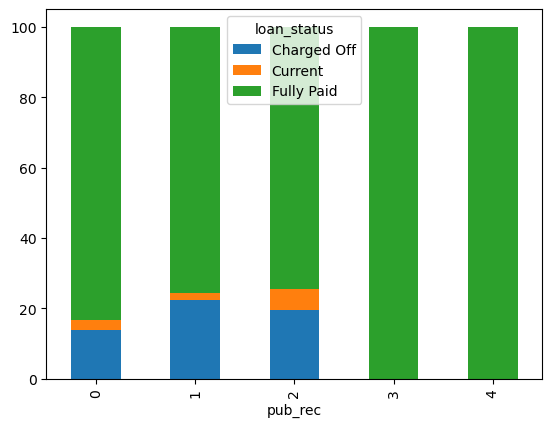

In [83]:
loan_data_pub_rec_pivot= loan_data.pivot_table(index="pub_rec",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pub_rec_pivot.reset_index(inplace=True)
percentage_cal(loan_data_pub_rec_pivot,"Charged Off","Current","Fully Paid")
loan_data_pub_rec_pivot=loan_data_pub_rec_pivot.drop("total",axis=1)
loan_data_pub_rec_pivot.plot(kind="bar",stacked=True,x="pub_rec")

#### Analyzing pub record of bankruptcies impact

In [84]:
loan_data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot: xlabel='pub_rec_bankruptcies'>

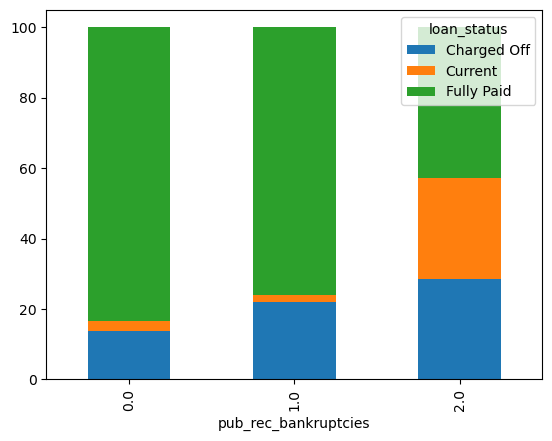

In [85]:
loan_data_pub_rec_bankruptcies_pivot= loan_data.pivot_table(index="pub_rec_bankruptcies",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_pub_rec_bankruptcies_pivot.reset_index(inplace=True)
percentage_cal(loan_data_pub_rec_bankruptcies_pivot,"Charged Off","Current","Fully Paid")
loan_data_pub_rec_bankruptcies_pivot=loan_data_pub_rec_bankruptcies_pivot.drop("total",axis=1)
loan_data_pub_rec_bankruptcies_pivot.plot(kind="bar",stacked=True,x="pub_rec_bankruptcies")

### 2.2 Bivariate Analysis

#### Analyzing income and dti together

In [86]:
loan_data["income_and_dti"]= loan_data[["income_bins","dti_bins"]].apply(lambda x: "_".join(x),axis=1)
loan_data.income_and_dti.value_counts()

lower_middle_class_10-15    4877
lower_middle_class_15-20    4775
lower_middle_class_20-30    3977
lower_middle_class_5-10     3633
lower_income_10-15          2260
lower_income_20-30          2235
lower_income_15-20          2206
lower_middle_class_0-5      2139
upper_middle_class_10-15    1926
lower_income_5-10           1813
upper_middle_class_5-10     1637
upper_middle_class_15-20    1566
lower_income_0-5            1281
upper_middle_class_20-30    1002
high_income_5-10             989
upper_middle_class_0-5       939
high_income_10-15            836
high_income_0-5              618
high_income_15-20            548
high_income_20-30            277
lower_income_0                82
lower_middle_class_0          68
upper_middle_class_0          23
high_income_0                 10
Name: income_and_dti, dtype: int64

In [87]:
loan_data_income_dti_pivot= loan_data.pivot_table(index="income_and_dti",columns="loan_status",values="id",aggfunc="count",fill_value=0)
loan_data_income_dti_pivot=loan_data_income_dti_pivot.reset_index()
loan_data_income_dti_pivot

loan_status,income_and_dti,Charged Off,Current,Fully Paid
0,high_income_0,2,0,8
1,high_income_0-5,48,18,552
2,high_income_10-15,93,36,707
3,high_income_15-20,76,25,447
4,high_income_20-30,33,8,236
5,high_income_5-10,96,38,855
6,lower_income_0,18,0,64
7,lower_income_0-5,187,13,1081
8,lower_income_10-15,422,48,1790
9,lower_income_15-20,398,42,1766


In [88]:
percentage_cal(loan_data_income_dti_pivot,"Charged Off","Current","Fully Paid")
loan_data_income_dti_pivot=loan_data_income_dti_pivot.drop(["total","Current","Fully Paid"],axis=1)


<AxesSubplot: xlabel='income_and_dti'>

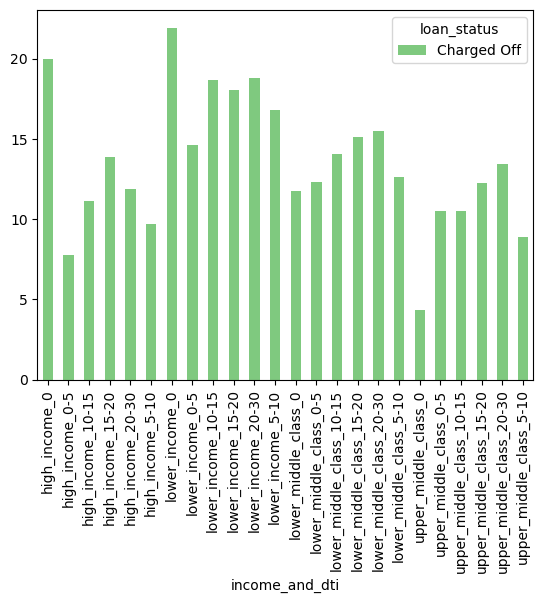

In [89]:
loan_data_income_dti_pivot= loan_data_income_dti_pivot.set_index("income_and_dti")
loan_data_income_dti_pivot.plot(kind="bar",colormap="Accent")

#### As we can see, the high income people can have high dti and lower income people have higher default even in lower dti

#### Analyzing income and home ownership together

In [90]:
loan_data_pivoted_3= loan_data.pivot_table(index=["income_bins","home_ownership"],values="id",columns="loan_status",aggfunc="count",fill_value=0)

In [91]:
loan_data_pivoted_3.reset_index(inplace=True)

In [92]:
loan_data_pivoted_3

loan_status,income_bins,home_ownership,Charged Off,Current,Fully Paid
0,lower_income,MORTGAGE,373,37,1686
1,lower_income,NONE,0,0,1
2,lower_income,OTHER,6,0,21
3,lower_income,OWN,196,34,974
4,lower_income,RENT,1176,108,5265
5,lower_middle_class,MORTGAGE,1242,331,7174
6,lower_middle_class,NONE,0,0,0
7,lower_middle_class,OTHER,9,0,36
8,lower_middle_class,OWN,185,34,1084
9,lower_middle_class,RENT,1317,220,7837


In [93]:
loan_data_pivoted_3= loan_data_pivoted_3.loc[loan_data_pivoted_3["home_ownership"]!="NONE",]
loan_data_pivoted_3= loan_data_pivoted_3.loc[loan_data_pivoted_3["home_ownership"]!="OTHER",]
loan_data_pivoted_3

loan_status,income_bins,home_ownership,Charged Off,Current,Fully Paid
0,lower_income,MORTGAGE,373,37,1686
3,lower_income,OWN,196,34,974
4,lower_income,RENT,1176,108,5265
5,lower_middle_class,MORTGAGE,1242,331,7174
8,lower_middle_class,OWN,185,34,1084
9,lower_middle_class,RENT,1317,220,7837
10,upper_middle_class,MORTGAGE,483,178,3864
13,upper_middle_class,OWN,43,9,305
14,upper_middle_class,RENT,247,64,1880
15,high_income,MORTGAGE,229,92,1970


In [94]:
loan_data_pivoted_3["income_home"]= loan_data_pivoted_3[["income_bins","home_ownership"]].apply(lambda x: "_".join(x),axis=1)

In [95]:
loan_data_pivoted_3["Total"]= loan_data_pivoted_3["Charged Off"]+loan_data_pivoted_3["Current"]+loan_data_pivoted_3["Fully Paid"]

In [96]:
loan_data_pivoted_3["Charged Off"]= loan_data_pivoted_3["Charged Off"]/loan_data_pivoted_3["Total"]
loan_data_pivoted_3["Current"]= loan_data_pivoted_3["Current"]/loan_data_pivoted_3["Total"]
loan_data_pivoted_3["Fully Paid"]= loan_data_pivoted_3["Fully Paid"]/loan_data_pivoted_3["Total"]

In [97]:
loan_data_pivoted_3= loan_data_pivoted_3.drop("Total",axis=1)
loan_data_pivoted_3

loan_status,income_bins,home_ownership,Charged Off,Current,Fully Paid,income_home
0,lower_income,MORTGAGE,0.177958,0.017653,0.804389,lower_income_MORTGAGE
3,lower_income,OWN,0.162791,0.028239,0.808970,lower_income_OWN
4,lower_income,RENT,0.179569,0.016491,0.803940,lower_income_RENT
5,lower_middle_class,MORTGAGE,0.141992,0.037842,0.820167,lower_middle_class_MORTGAGE
8,lower_middle_class,OWN,0.141980,0.026094,0.831926,lower_middle_class_OWN
9,lower_middle_class,RENT,0.140495,0.023469,0.836036,lower_middle_class_RENT
10,upper_middle_class,MORTGAGE,0.106740,0.039337,0.853923,upper_middle_class_MORTGAGE
13,upper_middle_class,OWN,0.120448,0.025210,0.854342,upper_middle_class_OWN
14,upper_middle_class,RENT,0.112734,0.029210,0.858056,upper_middle_class_RENT
15,high_income,MORTGAGE,0.099956,0.040157,0.859887,high_income_MORTGAGE


In [98]:
loan_data_pivoted_3_filtered= loan_data_pivoted_3.loc[:,["income_home","Charged Off","Fully Paid","Current"]]

<AxesSubplot: xlabel='income_home'>

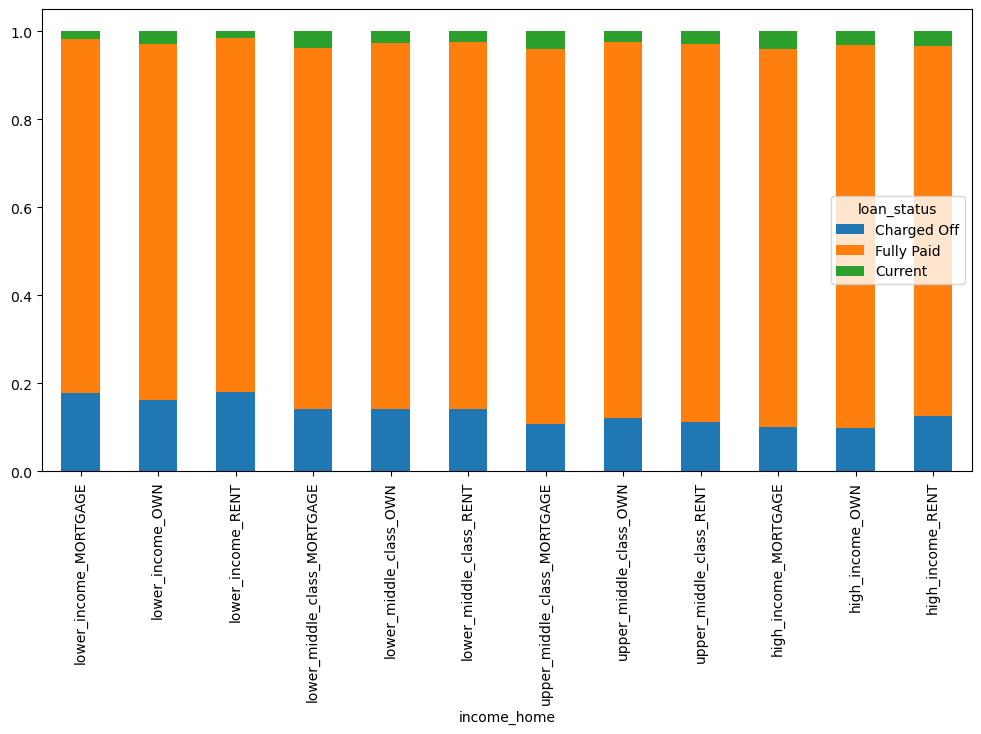

In [99]:
loan_data_pivoted_3_filtered.plot(kind="bar",stacked=True,x="income_home",figsize=(12,6))